# Simple linear regression

# 1) Delivery time;- predict delivery time using sorting time

##  import libraries 


In [126]:
import pandas as pd 
import scipy
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

## Import data

In [127]:
delivery_time_data =pd.read_csv('delivery_time.csv')
delivery_time_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data understanding

### initial analysis

In [3]:
delivery_time_data.shape

(21, 2)

In [4]:
delivery_time_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
delivery_time_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

## EDA and Data visualisation 

In [6]:
delivery_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<function matplotlib.pyplot.show(close=None, block=None)>

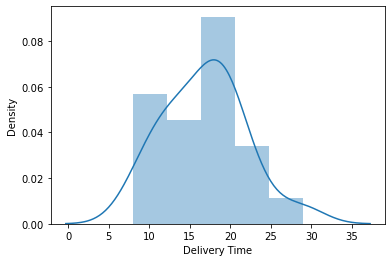

In [7]:
sns.distplot(delivery_time_data['Delivery Time'])
plt.show

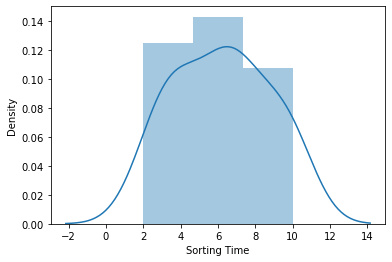

In [8]:
sns.distplot(delivery_time_data['Sorting Time'])
plt.show()

##  Feature engineering

In [9]:
delivery_time_data=delivery_time_data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
delivery_time_data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Correlation

In [128]:
delivery_data_corr = delivery_time_data.corr()
delivery_data_corr

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


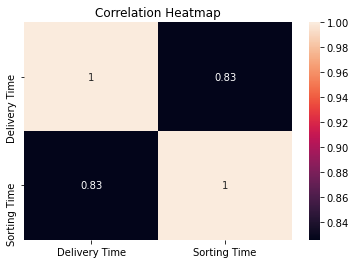

In [129]:
sns.heatmap(delivery_data_corr,annot=True)
plt.title('Correlation Heatmap')
None

In [11]:
delivery_time_data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


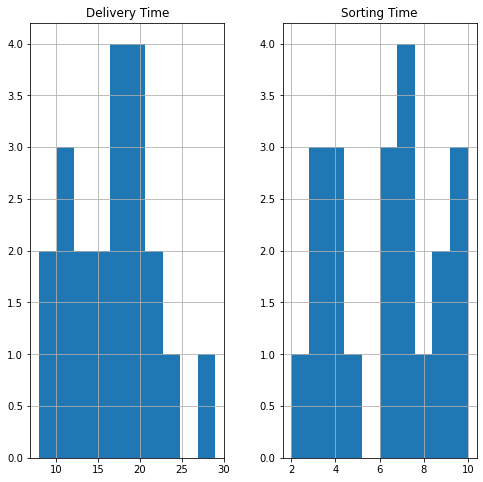

In [130]:
delivery_time_data.hist(figsize=(8,8),xlabelsize=10,ylabelsize=10)
None

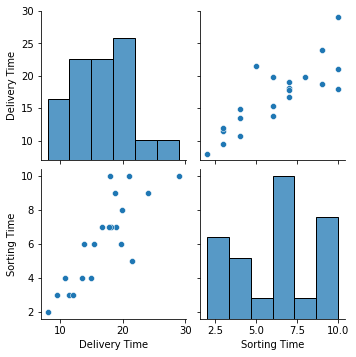

In [131]:
sns.pairplot(delivery_time_data)
None 

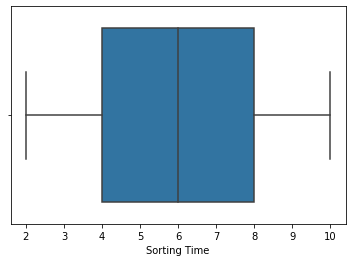

In [132]:
sns.boxplot(delivery_time_data['Sorting Time'])
None

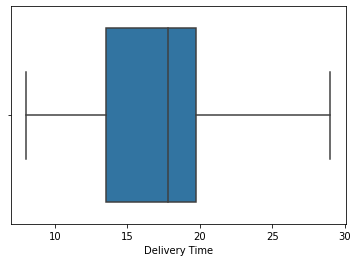

In [133]:
sns.boxplot(delivery_time_data['Delivery Time'])
None

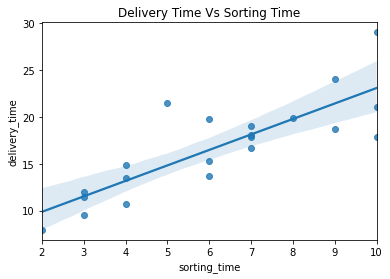

In [12]:
sns.regplot(x=delivery_time_data['sorting_time'], y=delivery_time_data['delivery_time'],data=delivery_time_data)
plt.title('Delivery Time Vs Sorting Time')
plt.show()

#                 OR

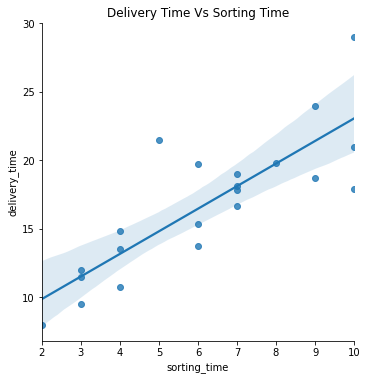

In [13]:
sns.lmplot(x='sorting_time',y='delivery_time',data= delivery_time_data)
plt.title('Delivery Time Vs Sorting Time')
plt.show()

#### Applying log function

In [52]:
X_inputs = delivery_time_data.copy()
X_inputs

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [53]:
X_inputs['log_sorting_time']  = np.log(X_inputs['delivery_time'])


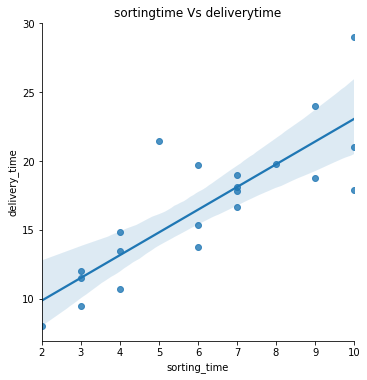

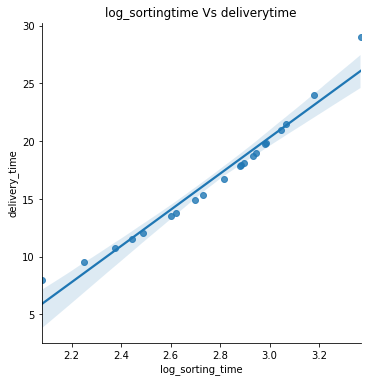

In [54]:
sns.lmplot(x='sorting_time',y='delivery_time',data=X_inputs)
plt.title('sortingtime Vs deliverytime')

sns.lmplot(x='log_sorting_time',y='delivery_time',data=X_inputs)
plt.title('log_sortingtime Vs deliverytime')
plt.show()

## Model building

In [14]:
model=smf.ols(formula='delivery_time~sorting_time',data=delivery_time_data).fit()

In [84]:
X = X_inputs[['sorting_time']]
y = X_inputs[['delivery_time']]

In [85]:
X.shape,y.shape

((21, 1), (21, 1))

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=None,)

In [87]:
X_train.shape ,y_train.shape #training

((16, 1), (16, 1))

In [88]:
X_train

,sorting_time
7,3
2,6
14,3
11,4
12,7
1,4
17,7
18,2
10,8
4,10


In [89]:
y_train

,delivery_time
7,9.50
2,19.75
14,12.03
11,10.75
12,16.68
1,13.50
17,18.11
18,8.00
10,19.83
4,29.00


In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [113]:
linear_model.intercept_

array([5.73108509])

In [114]:
linear_model.coef_

array([[1.7827984]])

In [92]:
X_test.shape , y_test.shape

((5, 1), (5, 1))

## Model testing

In [15]:
#finding coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        01:48:06   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# finding t-values and p-values
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [18]:
#finding R-squared values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model testing 

#### Manual testing 

y = mx+c

If x = 5, y = ?

If x = 4, y = ?

If x = 10, y = ?

In [19]:
(1.649020*5)+ 6.582734

14.827834

In [20]:
(1.649020*4)+ 6.582734

13.178814

In [21]:
(1.649020*10)+ 6.582734

23.072933999999997

In [97]:
model_1 = smf.ols(formula = 'delivery_time~log_sorting_time', data = X_inputs).fit()
print('R-square                           : ',round(model_1.rsquared,4))
print('Adjusted R-square                  : ',round(model_1.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_1.aic,4))
print('Bayesian information criterion(BIC): ',round(model_1.bic,4))

R-square                           :  0.9633
Adjusted R-square                  :  0.9614
Akaike information criterion (AIC) :  61.3604
Bayesian information criterion(BIC):  63.4494


#### Machine Prediction

In [22]:
test_data = pd.DataFrame(data={'sorting_time':[5,4,10]})
test_data

,sorting_time
0,5
1,4
2,10


In [23]:
model.predict(test_data)

0    14.827833
1    13.178814
2    23.072933
dtype: float64

### Model deployment

In [24]:
from pickle import dump

In [25]:
dump(model,open('model.pkl','wb'))

In [26]:
from pickle import load 

In [27]:
loaded_model=load(open('model.pkl','rb'))

In [28]:
loaded_model.predict(test_data)

0    14.827833
1    13.178814
2    23.072933
dtype: float64

# ==========================================================

# 2) Salary hike;- build a prediction  model for salary_hike

##  Import libraries

In [134]:
import pandas as pd 
import numpy as np
import scipy 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## Import data

In [135]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Data understanding

### Initial analysis

In [31]:
data.shape

(30, 2)

In [32]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [33]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### EDA and Data visualisation

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<function matplotlib.pyplot.show(close=None, block=None)>

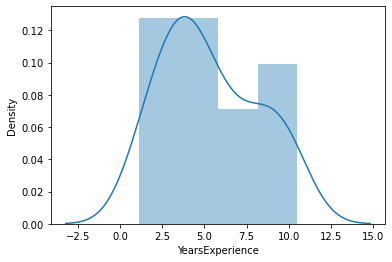

In [35]:
sns.distplot(data['YearsExperience'])
plt.show

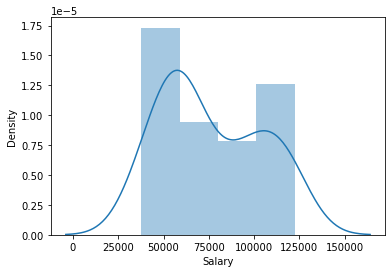

In [36]:
sns.distplot(data['Salary'])
plt.show()

## Correlation

In [138]:
data_corr = data.corr()
data_corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


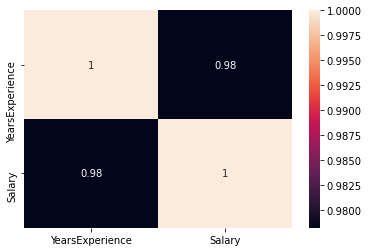

In [139]:
sns.heatmap(data_corr,annot=True)
None

In [38]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


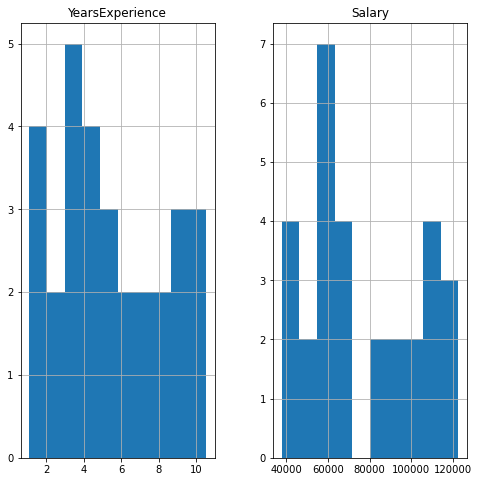

In [140]:
data.hist(figsize=(8,8),xlabelsize=10,ylabelsize=10)
None

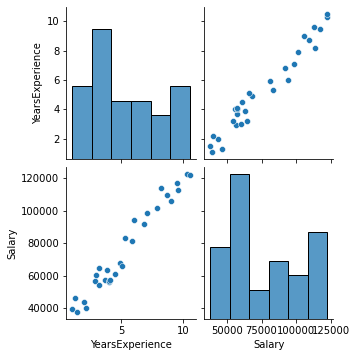

In [141]:
sns.pairplot(data)
None

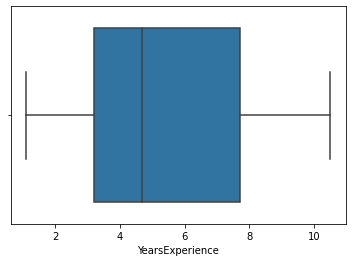

In [142]:
sns.boxplot(data['YearsExperience'])
None

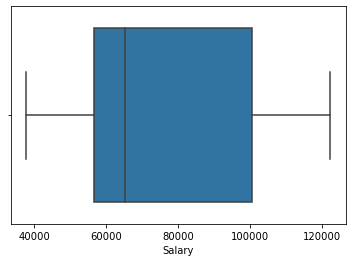

In [143]:
sns.boxplot(data['Salary'])
None

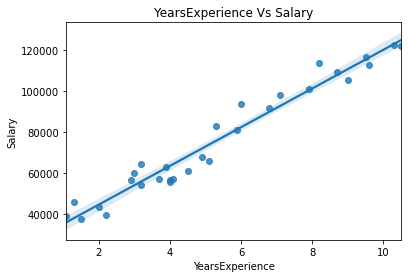

In [39]:
sns.regplot( x='YearsExperience', y='Salary',data=data)
plt.title('YearsExperience Vs Salary')
plt.show()

#                              OR

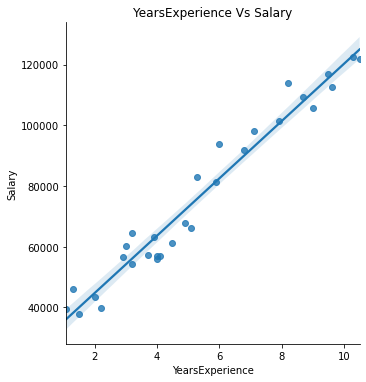

In [40]:
sns.lmplot(  x='YearsExperience',y='Salary',data=data)
plt.title('YearsExperience Vs Salary')
plt.show()

## Applying log transformation

In [110]:
X_inputs = data.copy()
X_inputs

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [111]:
X_inputs['log_YearsExperience']  = np.log(X_inputs['YearsExperience'])
X_inputs

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457
5,2.9,56642.0,1.064711
6,3.0,60150.0,1.098612
7,3.2,54445.0,1.163151
8,3.2,64445.0,1.163151
9,3.7,57189.0,1.308333


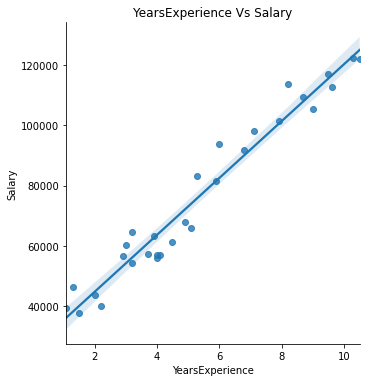

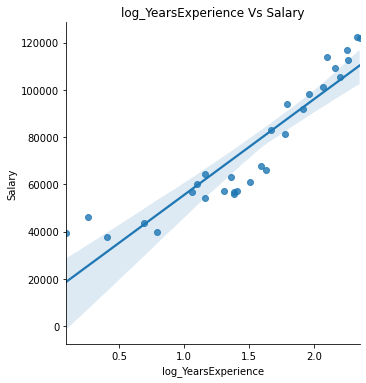

In [43]:
sns.lmplot(x='YearsExperience',y='Salary',data=X_inputs)
plt.title('YearsExperience Vs Salary')

sns.lmplot(x='log_YearsExperience',y='Salary',data=X_inputs)
plt.title('log_YearsExperience Vs Salary')
plt.show()

### Model Building

In [44]:
model = smf.ols("Salary~YearsExperience",data=data).fit()

In [45]:
X = X_inputs[['log_YearsExperience']]
y = X_inputs[['Salary']]

In [46]:
X.shape,y.shape

((30, 1), (30, 1))

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=None,)

In [48]:
X_train.shape ,y_train.shape #training

((24, 1), (24, 1))

In [49]:
X_train

,log_YearsExperience
21,1.960095
4,0.788457
23,2.104134
29,2.351375
22,2.066863
6,1.098612
24,2.163323
28,2.332144
7,1.163151
11,1.386294


In [50]:
y_train

,Salary
21,98273.0
4,39891.0
23,113812.0
29,121872.0
22,101302.0
6,60150.0
24,109431.0
28,122391.0
7,54445.0
11,55794.0


In [56]:
from sklearn.linear_model import LinearRegression

In [116]:
linear_model_1 = LinearRegression()
linear_model_1.fit(X_train,y_train)

LinearRegression()

In [118]:
linear_model_1.intercept_

array([5.73108509])

In [119]:
linear_model_1.coef_

array([[1.7827984]])

In [58]:
X_test.shape , y_test.shape

((6, 1), (6, 1))

### Model Testing

In [124]:
from sklearn.linear_model import LinearRegression
linear_model_1 = LinearRegression()
linear_model_1.fit(X_train,y_train)

LinearRegression()

####  Calculate the error for the data training

In [125]:
y_pred_train = linear_model_1.predict(X_train)

In [126]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [127]:
mean_squared_error(y_train,y_pred_train)

6.332882374357512

In [128]:
mean_absolute_error(y_train,y_pred_train)

1.9227591376356372

####  Calculate the data for the test data

In [129]:
y_pred_test = linear_model_1.predict(X_test)

In [130]:
mean_squared_error(y_test,y_pred_test)

12.931590390283626

In [131]:
mean_absolute_error(y_test,y_pred_test)

2.811492861222158

In [132]:
y_pred_train

array([[11.0794803],
       [16.4278755],
       [11.0794803],
       [12.8622787],
       [18.2106739],
       [12.8622787],
       [18.2106739],
       [ 9.2966819],
       [19.9934723],
       [23.5590691],
       [12.8622787],
       [18.2106739],
       [21.7762707],
       [18.2106739],
       [23.5590691],
       [23.5590691]])

In [133]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        02:36:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
#Finding coefficient numbers
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [135]:
#Finding p-values and t-values
model.tvalues   ,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [136]:
# Finding  Rsquared values
model.rsquared  ,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

###  Model testing

#### Manual testing

y = mx+c

If x = 2, y = ?

If x = 3, y = ?

If x = 5, y = ?

In [72]:
(9449.962321*2)+ 25792.200199

44692.124841

In [73]:
(9449.962321*3)+ 25792.200199

54142.087162

In [74]:
(9449.962321*5)+ 25792.200199

73042.01180400001

In [112]:
model_1 = smf.ols(formula = 'Salary~log_YearsExperience', data = X_inputs).fit()
print('R-square                           : ',round(model_1.rsquared,4))
print('Adjusted R-square                  : ',round(model_1.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(model_1.aic,4))
print('Bayesian information criterion(BIC): ',round(model_1.bic,4))

R-square                           :  0.8539
Adjusted R-square                  :  0.8487
Akaike information criterion (AIC) :  643.5471
Bayesian information criterion(BIC):  646.3495


#### Machine prediction

In [75]:
salary = pd.DataFrame(data={'YearsExperience':[2,3,5]})
salary

,YearsExperience
0,2
1,3
2,5


In [80]:
model.predict(salary)

0    44692.124842
1    54142.087163
2    73042.011806
dtype: float64

### Model Deployment

In [81]:
from pickle import dump

In [82]:
from pickle import load  

In [83]:
model.predict(salary)

0    44692.124842
1    54142.087163
2    73042.011806
dtype: float64

# ==========================================================